
================ General Dataset Info ================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB
None

================ First 5 Rows ================

 

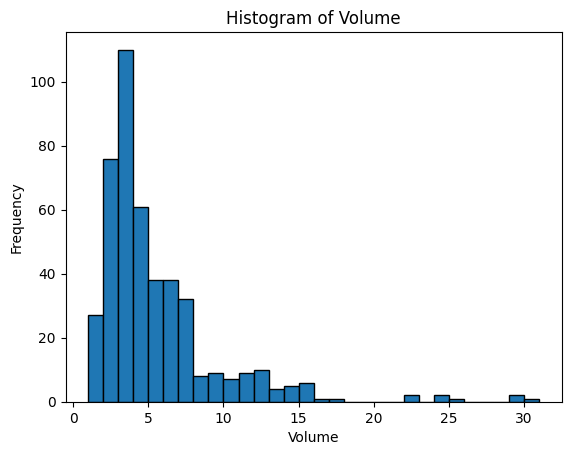

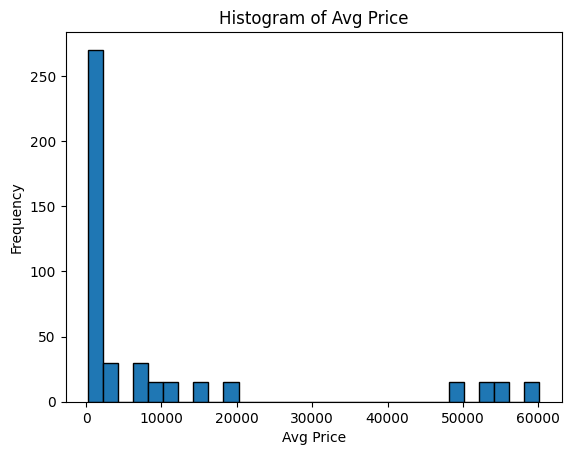

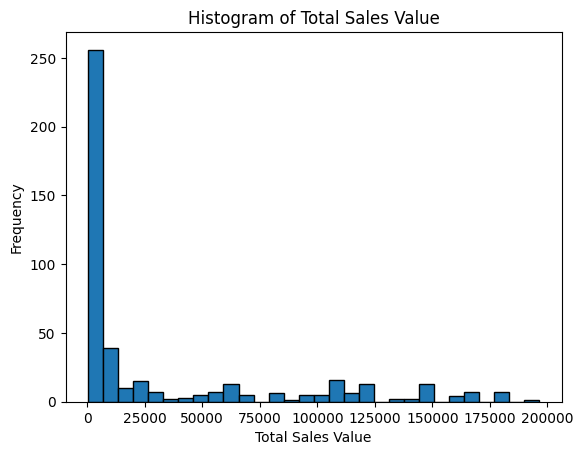

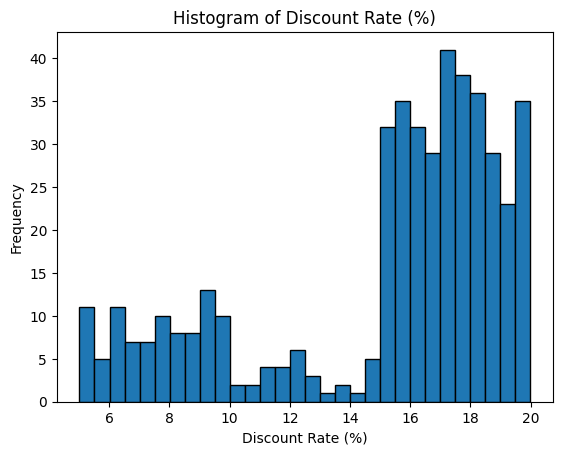

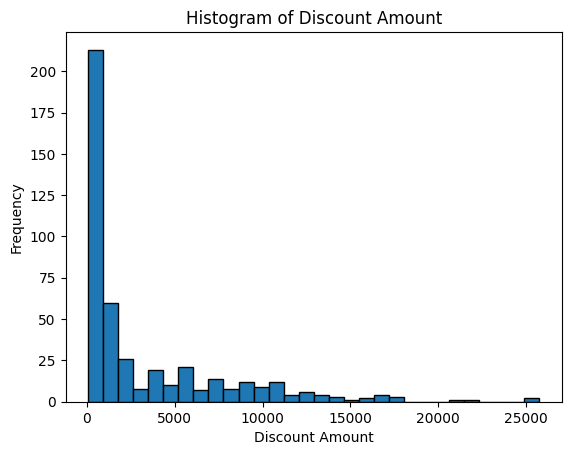

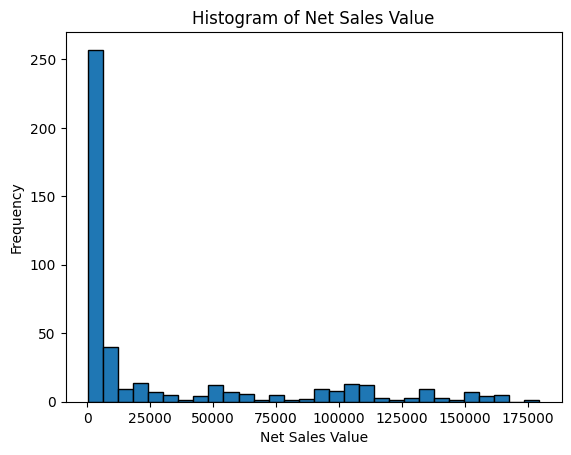

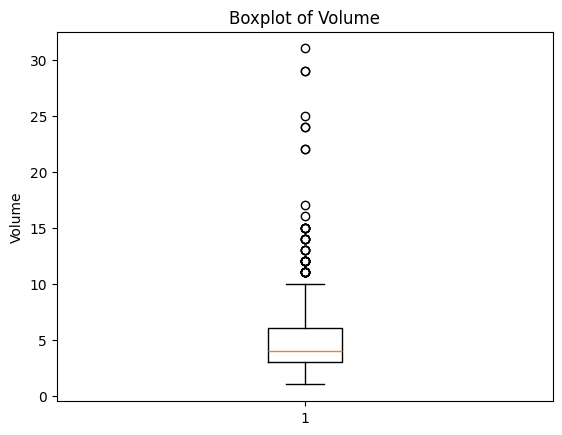

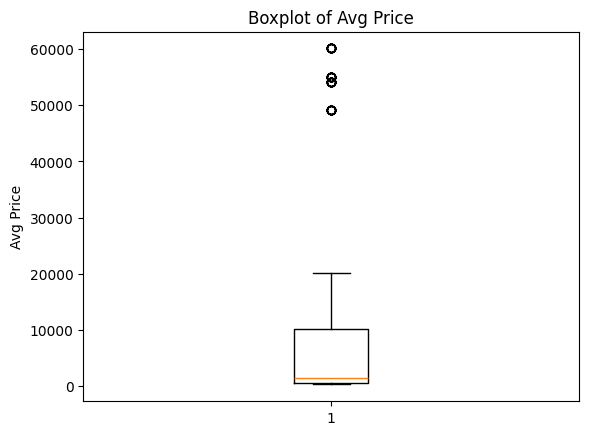

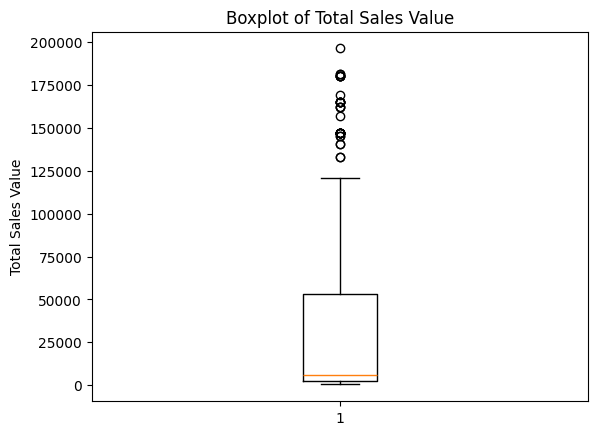

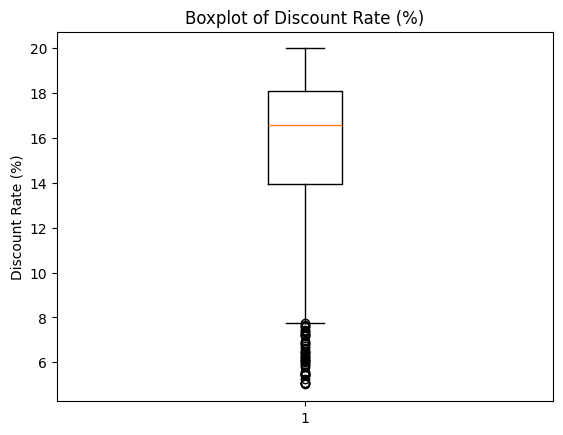

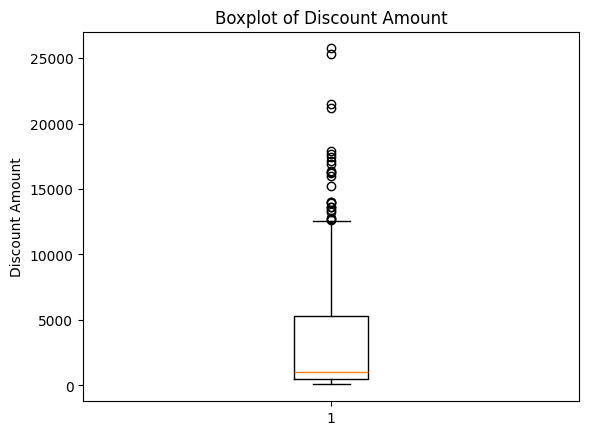

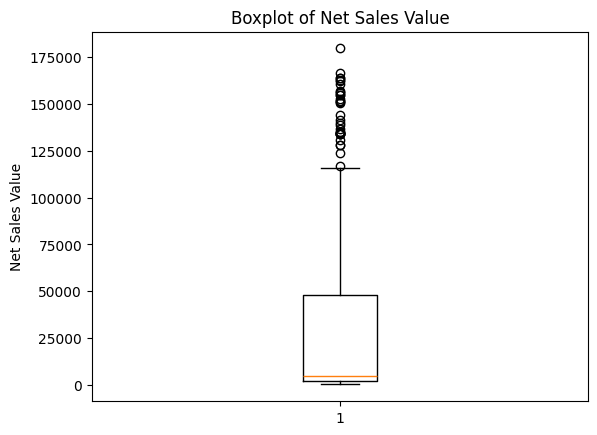

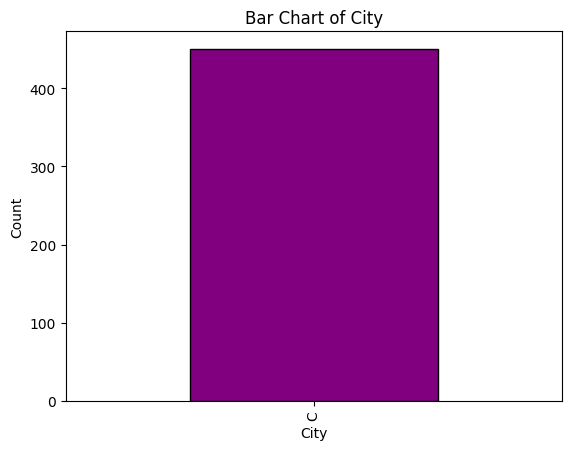

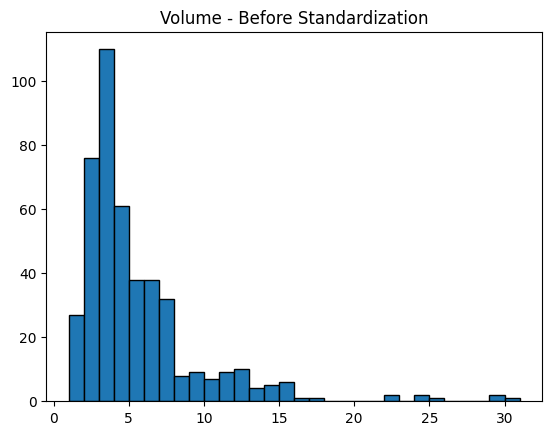

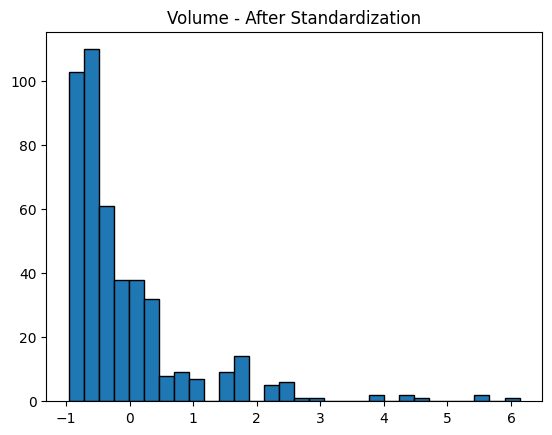


================ Standardized Numerical Data (Preview) ================

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  
0         2.804756  
1         1.271026  
2         1.545675  
3         1.765810  
4        -0.227595  

================ Final Transformed Dataset (Preview) ================

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014  

In [ ]:
# ============================================================
# Descriptive Analytics & Data Preprocessing on Sales Dataset
# ============================================================

# --------- Importing the  Required Libraries ----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# --------- Load Dataset ----------
df = pd.read_csv("C:/Users/Shreyas Mahale/Downloads/Basic stats - 1 (3)/Basic stats - 1/sales_data_with_discounts.csv")

print("\n================ General Dataset Info ================\n")
print(df.info())

print("\n================ First 5 Rows ================\n")
print(df.head())

print("\n================ Last 5 Rows ================\n")
print(df.tail())

# --------- Identifying Numerical & Categorical Columns ----------
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

print("\nNumerical Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))

# ============================================================
# 1. DESCRIPTIVE ANALYTICS
# ============================================================

stats = pd.DataFrame({
    "Mean": df[num_cols].mean(),
    "Median": df[num_cols].median(),
    "Mode": df[num_cols].mode().iloc[0],
    "Std Dev": df[num_cols].std()
})

print("\n================ Descriptive Statistics ================\n")
print(stats)

# ============================================================
# 2. DATA VISUALIZATION
# ============================================================

# ---- Histograms ----
for col in num_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# ---- Boxplots ----
for col in num_cols:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=True)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

# ---- Bar Chart for a Categorical Column (City) ----
if "City" in df.columns:
    plt.figure()
    df["City"].value_counts().plot(kind="bar", color='purple', edgecolor='black')
    plt.title("Bar Chart of City")
    plt.xlabel("City")
    plt.ylabel("Count")
    plt.show()

# ============================================================
# 3. STANDARDIZATION (Z-SCORE NORMALIZATION)
# ============================================================

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_cols])
scaled_df = pd.DataFrame(scaled_data, columns=num_cols)

# Before vs After example (Volume)
if "Volume" in df.columns:
    plt.figure()
    plt.hist(df["Volume"], bins=30, edgecolor='black')
    plt.title("Volume - Before Standardization")
    plt.show()

    plt.figure()
    plt.hist(scaled_df["Volume"], bins=30, edgecolor='black')
    plt.title("Volume - After Standardization")
    plt.show()

print("\n================ Standardized Numerical Data (Preview) ================\n")
print(scaled_df.head())

# ============================================================
# 4. ONE-HOT ENCODING OF CATEGORICAL VARIABLES
# ============================================================

dummy_df = pd.get_dummies(df[cat_cols], drop_first=True)

# Combine standardized numerical + encoded categorical
final_df = pd.concat([scaled_df, dummy_df], axis=1)

print("\n================ Final Transformed Dataset (Preview) ================\n")
print(final_df.head())

print("\nFinal Dataset Shape:", final_df.shape)

# ============================================================
# END OF PROGRAM
# ============================================================